In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
%matplotlib inline

In [4]:
base_dir = "/Users/Jackie/Dropbox/Work/machine_learning/hw/machine-learning-ex7/ex7"

In [8]:
data = loadmat(os.path.join(base_dir, 'ex7data2.mat'))
X = data['X']

In [9]:

print(X.shape)
print(X[:5, :])

(300, 2)
[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


In [10]:
# select an inital set of centroids 
K = 3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5] ])

In [69]:

def findClosestCentroids(X, centroids):
    """
        return 1d array with m * 1
    """
    K = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros(m)
    
    def get_distance(x, y):
        """get distance"""
        return np.linalg.norm(x - y) 
    
    for i in range(m):
        d = get_distance(X[i, :], centroids[0, :])        
        for j in range(1, K):
            tmp_d = get_distance(X[i, :], centroids[j, :])
            if tmp_d < d:
                d = tmp_d 
                idx[i] = j 
    return idx 
    
    
        
idx = findClosestCentroids(X, initial_centroids)    
print(idx[:3])
    

[0. 2. 1.]


In [22]:
# Part 2: Compute means

def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros([K, n])
    
    for i in range(K):        
        centroids[i, :] =  np.mean(X[idx == i, :] , axis=0)     
    return centroids 

centroids = computeCentroids(X, idx, K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [23]:
# K-Means Clustering
data2 = loadmat(os.path.join(base_dir, 'ex7data2'))

In [26]:
K, max_iters = 3, 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5] ])

def runkMeans(X, initial_centroids, max_iters, plot_progress=True):    
    centroids = initial_centroids.copy()
    K = centroids.shape[0]
    
    for i in range(max_iters):
        print('K-Means iteration %d/%d' %(i, max_iters))
        idx = findClosestCentroids(X, centroids)
    
        centroids =  computeCentroids(X, idx, K)    
    return centroids, idx 

centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
    

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


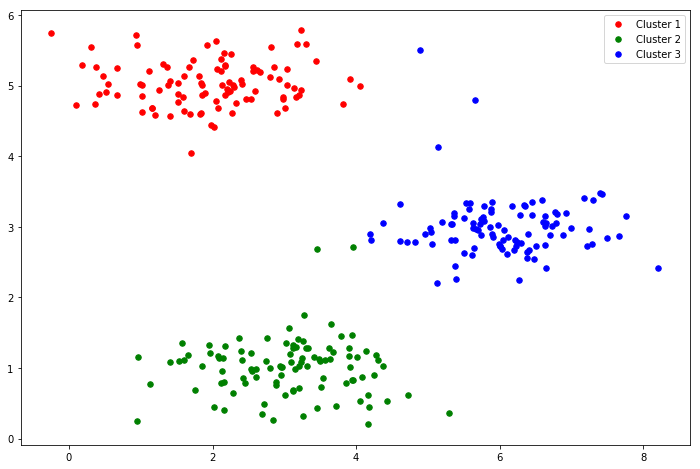

In [28]:
cluster1 = X[idx == 0,:]
cluster2 = X[idx == 1,:]
cluster3 = X[idx == 2,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


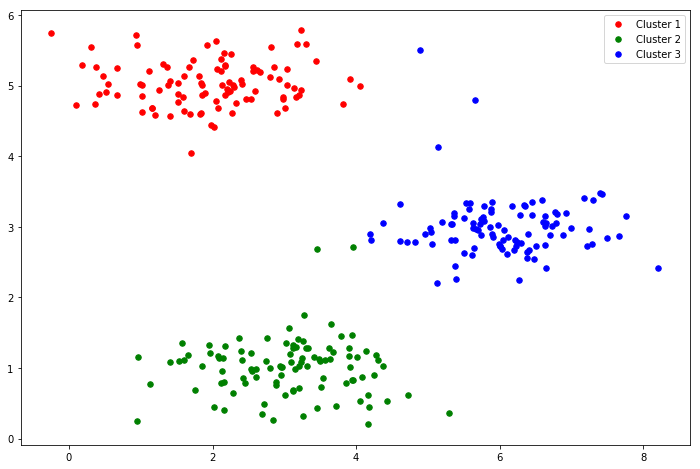

In [61]:
# random initiliaztion 
def kMeansInitCentroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    init_centroids = X[randidx[:K], :]
    return init_centroids

init_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)

cluster1 = X[idx == 0,:]
cluster2 = X[idx == 1,:]
cluster3 = X[idx == 2,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

(128, 128, 3)


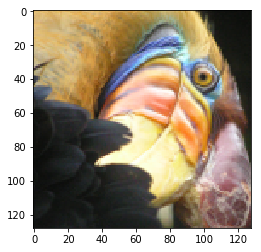

In [131]:
# from IPython.display import Image
# Image(filename=os.path.join(base_dir, 'bird_small.png') )
# image_data = loadmat(os.path.join(base_dir, 'bird_small.mat'))
# A = image_data['A']
A = plt.imread(os.path.join(base_dir, 'bird_small.png') )
m = A.shape[0]
# normalize value ranges
#A = A * 255.
print(A.shape)

# warning: A: (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
plt.imshow(A)

In [169]:
def compress(A, K = 16):
    # WARNING:
    # if A_recoverd is integer, please call A_recoverd.astype('uint8')
    # as plt,imshow requires A: (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
    A_reshape = A.reshape(A.shape[0] * A.shape[1], -1)    
    max_iters = 10
    init_centroids =  kMeansInitCentroids(A_reshape, K)
    centroids, idx = runkMeans(A_reshape, init_centroids, max_iters)
    A_recovered = centroids[idx.astype(int), :].reshape(A.shape[0], A.shape[1], 3)
    plt.imshow(A_recovered)
    return A_recovered

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


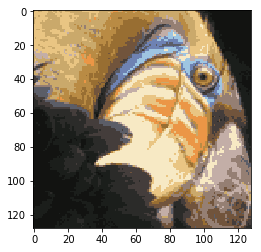

In [170]:


A_compressed = compress(A)

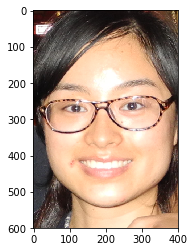

In [173]:
B = plt.imread(os.path.join(base_dir, 'DSCN0907.png') )
B = B[1000:1600, 2000:2400, :]
plt.imshow(B)

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


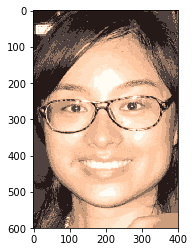

In [174]:
B_recovered = compress(B, K=10)

# PCA

In [179]:
data = loadmat(os.path.join(base_dir, 'ex7data1.mat'))
X = data['X']

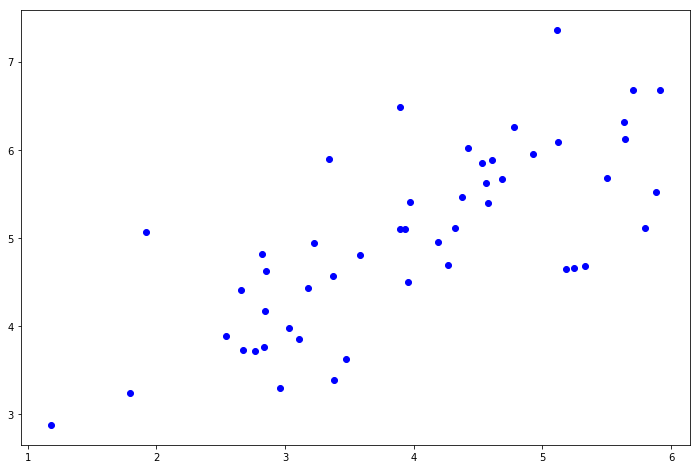

In [204]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X[:,0], X[:,1], 'bo')

In [230]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma
    
def pca(X):
    m, n = X.shape
    U = np.zeros(n)
    S = np.zeros(n)
    cov = np.cov(X.T)
    U, S, vh = np.linalg.svd(cov)
    return U, S
    
X_norm, mu, sigma = featureNormalize(X)    
U, S = pca(X_norm)
print('top eigenvector: %s ' % U[:,0])


top eigenvector: [-0.70710678 -0.70710678] 


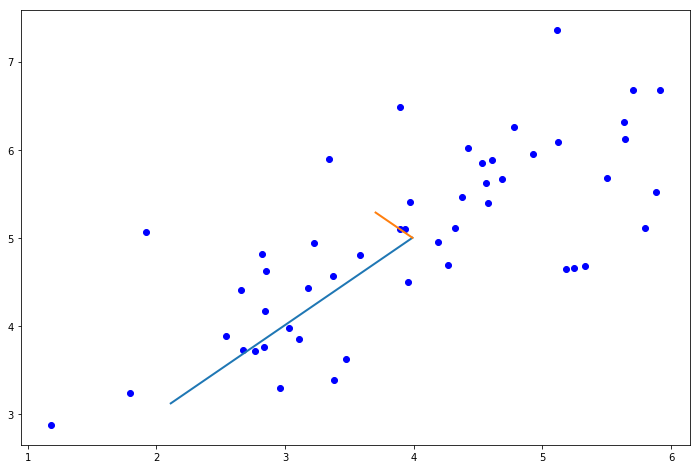

In [232]:
# plot two eigenvector 

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(X[:,0], X[:,1], 'bo')

def drawLine(ax, x1, x2):
    ax.plot((x1[0], x2[0]), (x1[1], x2[1]), linewidth=2.0)

e1 = mu + 1.5 *S[0] * U[:, 0]
e2 = mu + 1.5 *S[1] * U[:, 1]
drawLine(ax, mu, e1)
drawLine(ax, mu, e2)


In [256]:
# dimension reduction 
def projectData(X, U, K):
    """
    %PROJECTDATA Computes the reduced data representation when projecting only 
    %on to the top k eigenvectors
    %   Z = projectData(X, U, K) computes the projection of 
    %   the normalized inputs X into the reduced dimensional space spanned by
    %   the first K columns of U. It returns the projected examples in Z.
    %    
    """
    m, n = X.shape
    Z = np.zeros((m, K))
    Z = X.dot(U[:, :K])
#     for i in range(K):
#         Z[:, i] = X.dot(U[:, i]) 
    
    return Z
    
def recoverData(Z, U, K):
    """
    %RECOVERDATA Recovers an approximation of the original data when using the 
    %projected data
    %   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
    %   original data that has been reduced to K dimensions. It returns the
    %   approximate reconstruction in X_rec.
    %

    % You need to return the following variables correctly.
    """    
    X_rec = Z.dot(U[:, :K].T)
    return X_rec

K = 1 
Z = projectData(X_norm, U, K)
X_rec  = recoverData(Z, U, K)
print(Z[0, :])
print(X_rec[0, :])

[1.49631261]
[-1.05805279 -1.05805279]


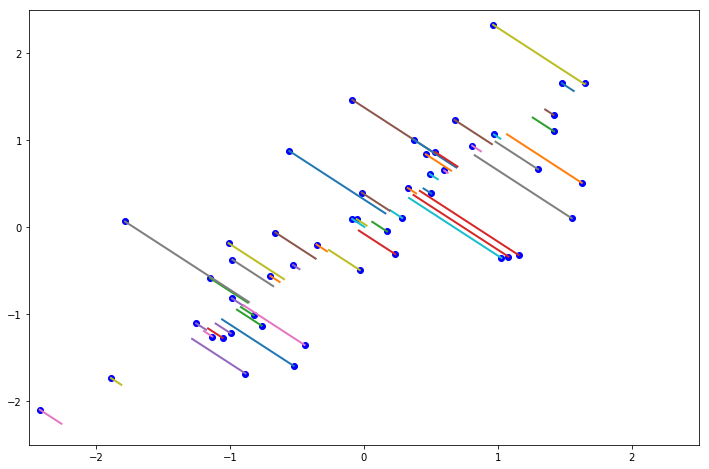

In [263]:
# Draw lines connecting the projected points to the original points
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X_norm[:,0], X_norm[:,1], 'bo')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
for i in range(X_rec.shape[0]):    
    drawLine(ax, X_norm[i, :], X_rec[i, :])

# face value PCA

In [279]:
face_data = loadmat(os.path.join(base_dir, 'ex7faces.mat'))
X = face_data['X']
print(X.shape)

(5000, 1024)


In [308]:
def plot_face(X, K):
    K = max(K, 20)
    n = K // 5 
    fig, ax = plt.subplots(n, 5, figsize=(12,8))
    for idx in range(K):
        i = idx // 5
        j = idx % 5
        ax[i][j].imshow(X[idx,:].reshape(32, 32).T, cmap='gray')

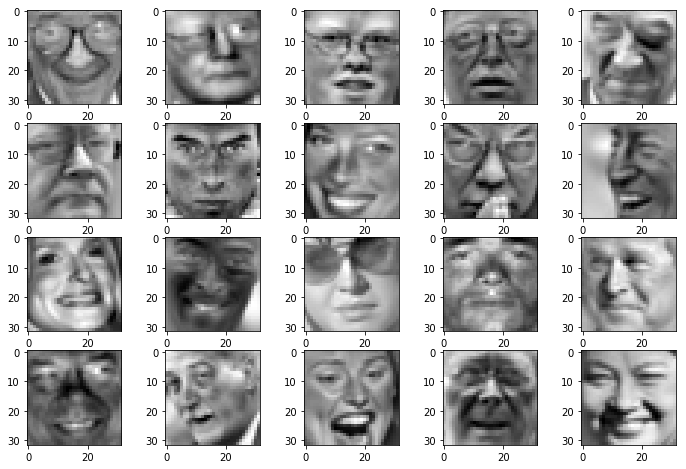

In [309]:
plot_face(X_norm, 20)

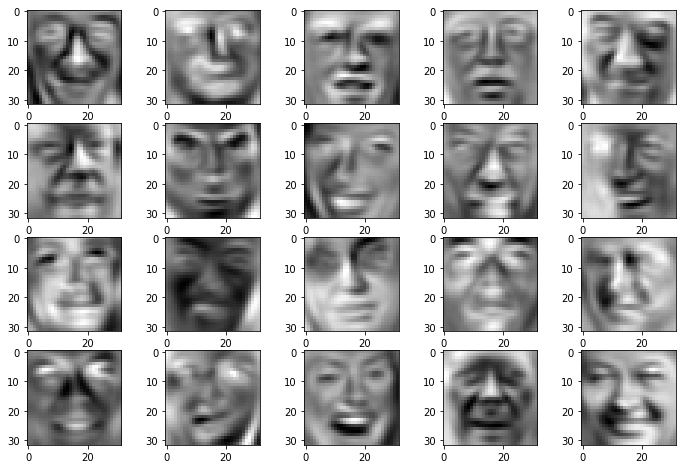

In [310]:
X_norm, mu, sigma = featureNormalize(X)
[U, S] = pca(X_norm)

K = 100
Z = projectData(X_norm, U, K)
X_norm_rec  = recoverData(Z, U, K)

X_rec = (X_norm_rec + mu) * sigma

plot_face(X_norm_rec, 20)